In [4]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [5]:
# just select the path
dir_path = "/home/data_transfer/slowcontrol_data/ImageData/HeightData/20221018/20221018/run/"
heightFromTxt=np.load(dir_path+"height_info.npy")
lateralFromTxt=np.load(dir_path+"lateral_info.npy")
timeFromTxt=np.load(dir_path+"time_info.npy")



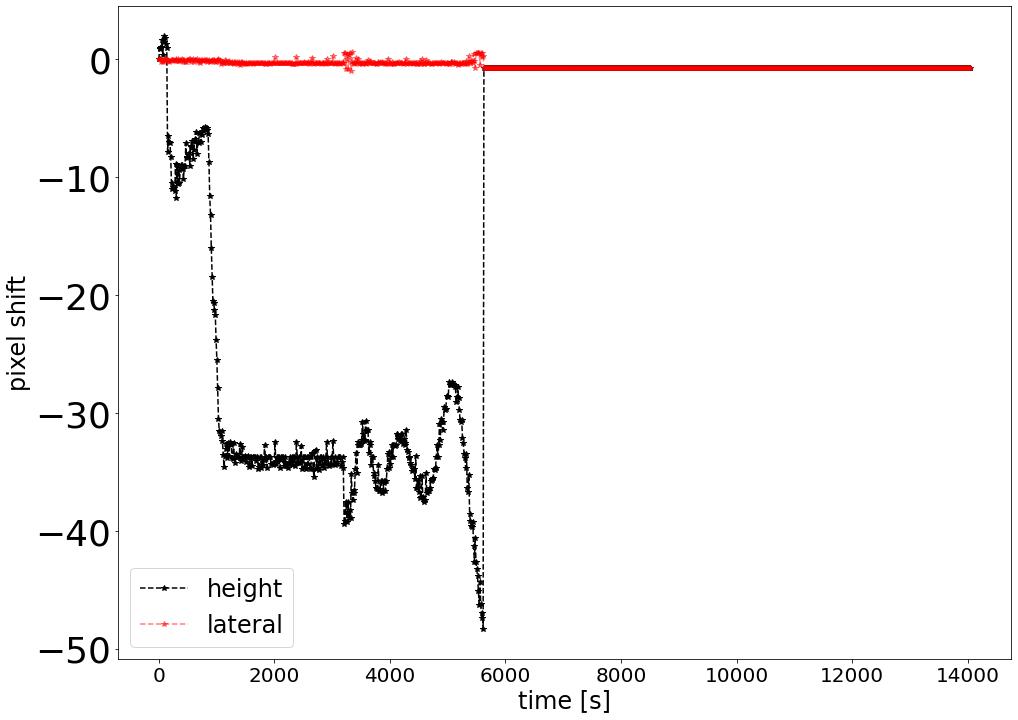

In [3]:
# pandas data frame (not really necessary here but doesn't hurt either)

df_new = pd.DataFrame()
df_new["Height"]=heightFromTxt
df_new["Lateral"]=lateralFromTxt

df_new["Time"]=(timeFromTxt-timeFromTxt[0])
# plot
# span can be used to average the files
plt.plot(df_new["Time"],df_new.Height.ewm(span=1,adjust=True).mean(),label="height",linestyle="dashed",marker="*",c="black")
plt.plot(df_new["Time"],df_new.Lateral.ewm(span=1,adjust=True).mean(),label="lateral",linestyle="dashed",marker="*",c="red",alpha=0.5)

plt.ylabel("pixel shift")
plt.xlabel("time [s]")
#plt.ylim(-15,15)
#plt.xlim(0,900)
plt.legend()
plt.show()

## Load the height file which is generated by a simple pcc algorithm in LabView during data taking

In [56]:
# just select the path
dir_path = "/data/SC_data/ImageData/HeightData/20221018/20221018/run/"
heightFromTxt=np.load(dir_path+"height_info.npy")
timeFromTxt=np.load(dir_path+"time_info.npy")



In [57]:
# pandas data frame (not really necessary here but doesn't hurt either)

df_new = pd.DataFrame()
df_new["Height"]=heightFromTxt
df_new["Time"]=(timeFromTxt-timeFromTxt[0])

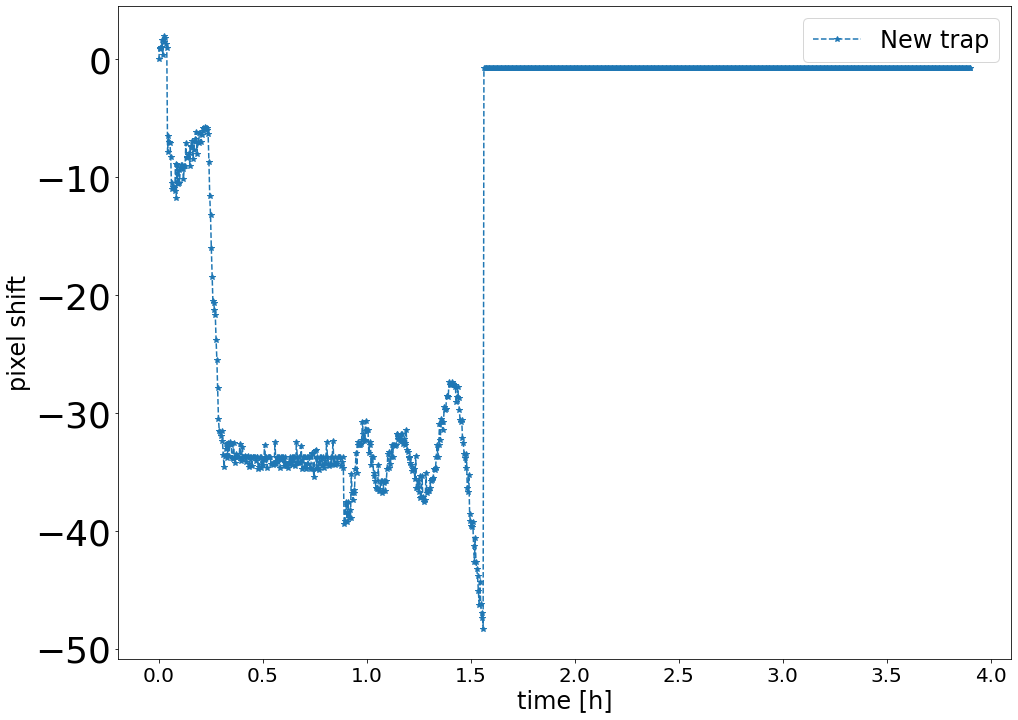

In [58]:
# plot
# span can be used to average the files
plt.plot(df_new.Time/3600,df_new.Height.ewm(span=1,adjust=True).mean(),label="New trap",linestyle="dashed",marker="*")
plt.ylabel("pixel shift")
plt.xlabel("time [h]")
#plt.ylim(15,-15)
plt.legend()
plt.show()

## In case the vanilla method does not work, do some manual work

In [6]:
# load the images
#dir_path = "/data/SC_data/ImageData/HeightData/20210616/run/i*npy"
dir_path = "/data/SC_data/ImageData/HeightData/20221019/20221020/run/*test*"
#dir_path = "/home/data_transfer/data_from_windows/"

test_images = load_npy_files(dir_path)

/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_0.npy 0
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_1.npy 1
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_2.npy 2
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_3.npy 3
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_4.npy 4
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_5.npy 5
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_6.npy 6
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_7.npy 7
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_8.npy 8
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_9.npy 9
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_10.npy 10
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_11.npy 11
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_12.npy 12
/data/

/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_251.npy 251
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_252.npy 252
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_253.npy 253
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_254.npy 254
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_255.npy 255
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_256.npy 256
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_257.npy 257
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_258.npy 258
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_259.npy 259
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_260.npy 260
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_261.npy 261
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_262.npy 262
/data/SC_data/ImageData/HeightData/20221

/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_488.npy 488
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_489.npy 489
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_490.npy 490
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_491.npy 491
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_492.npy 492
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_493.npy 493
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_494.npy 494
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_495.npy 495
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_496.npy 496
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_497.npy 497
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_498.npy 498
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_499.npy 499
/data/SC_data/ImageData/HeightData/20221

/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_632.npy 632
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_633.npy 633
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_634.npy 634
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_635.npy 635
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_636.npy 636
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_637.npy 637
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_638.npy 638
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_639.npy 639
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_640.npy 640
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_641.npy 641
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_642.npy 642
/data/SC_data/ImageData/HeightData/20221019/20221020/run/image_test_643.npy 643
/data/SC_data/ImageData/HeightData/20221

In [28]:
argmax = []
for images in test_images:
    argmax.append(np.argmax(np.mean(images,axis=1)))

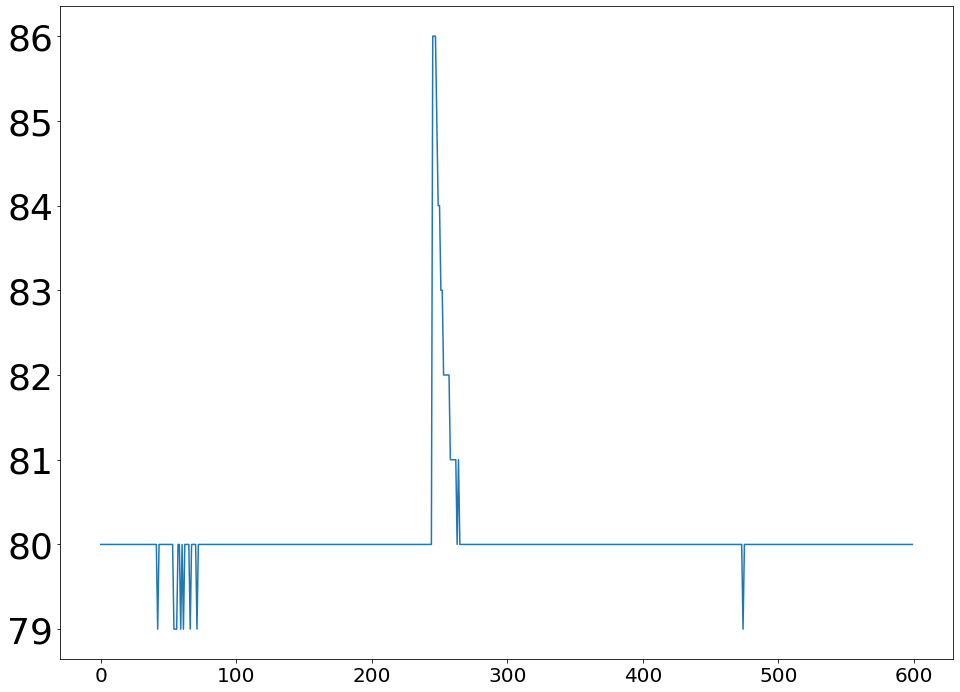

In [32]:
plt.plot(argmax[:600])

    

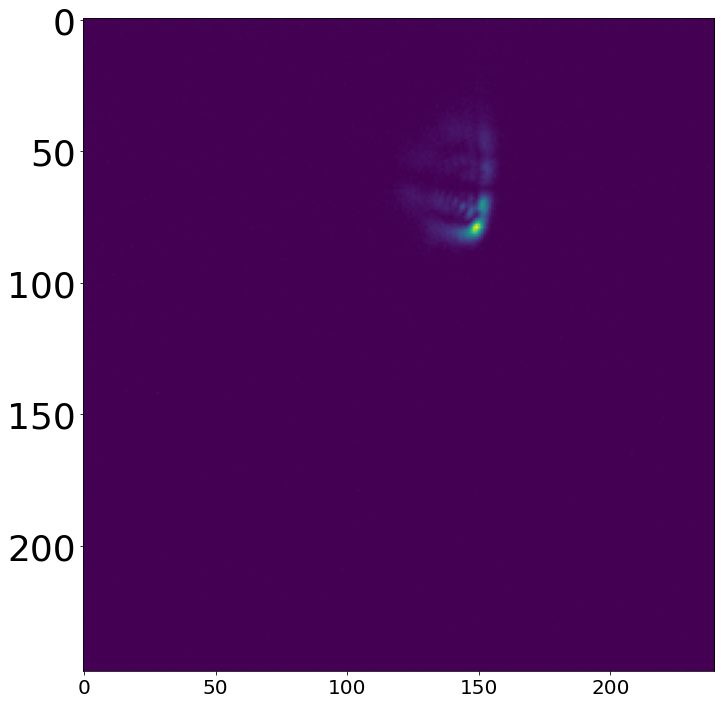

In [23]:
plt.imshow(test_images[244])

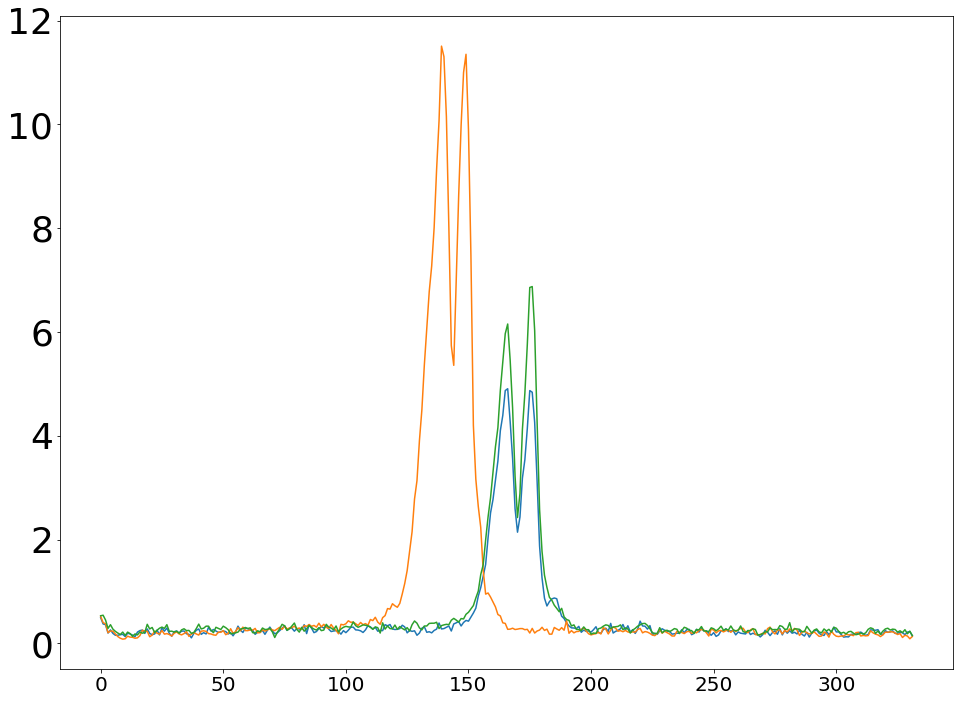

In [85]:
plt.plot(np.mean(test_images[136],axis=1))
plt.plot(np.mean(test_images[55],axis=1))
plt.plot(np.mean(test_images[101],axis=1))

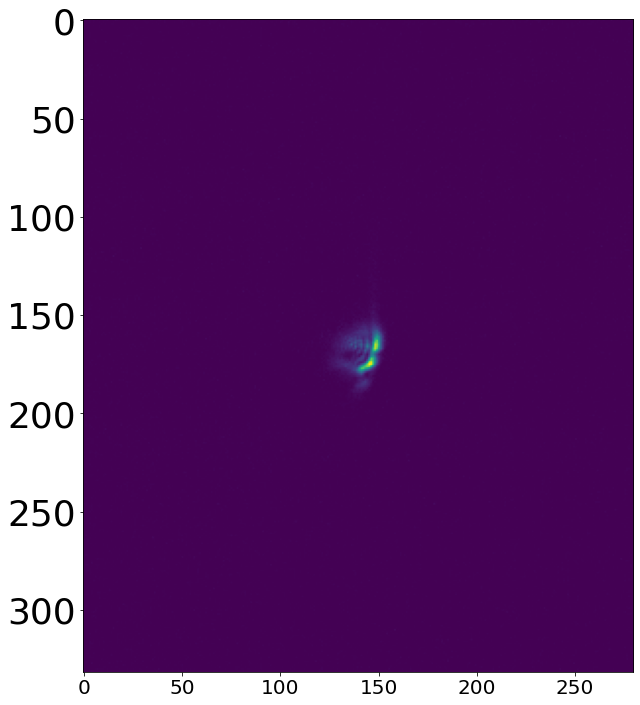

In [89]:
plt.imshow(test_images[136])

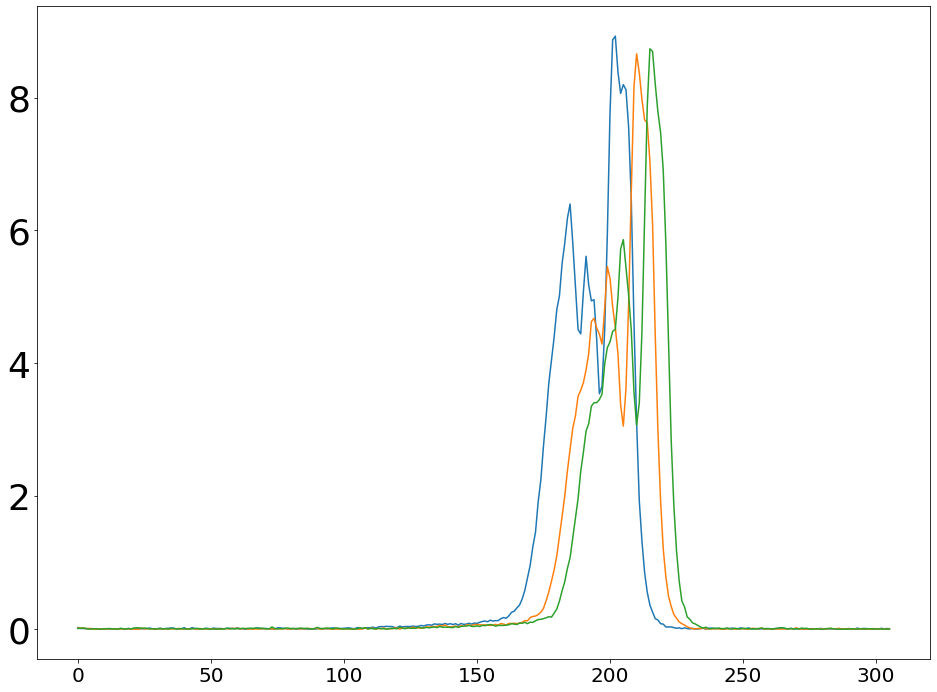

In [36]:
plt.plot(np.mean(test_images[3000],axis=1))
plt.plot(np.mean(test_images[4000],axis=1))
plt.plot(np.mean(test_images[4620],axis=1))

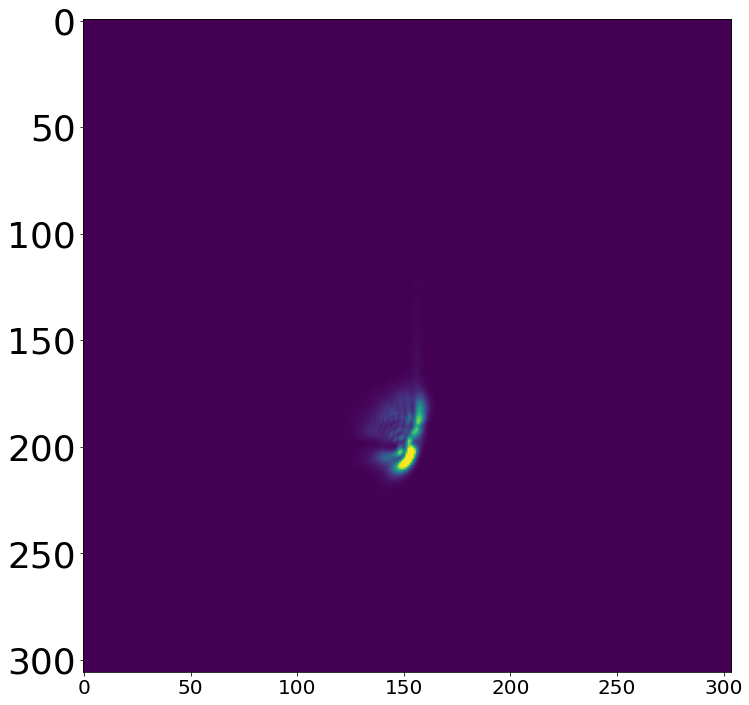

In [31]:
plt.imshow(test_images[3800])

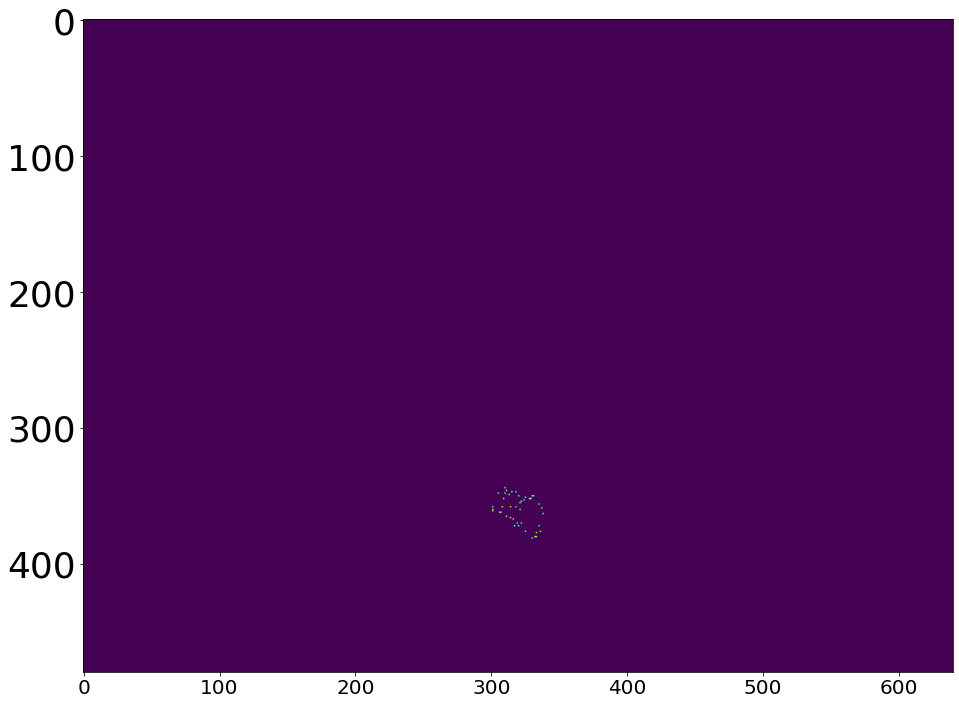

In [88]:
imig = threshold_image(test_images[3],34,55)
imig2 = threshold_image(test_images[2],34,55)

plt.imshow(imig-imig2)

In [89]:
shiftlist2 = [pcc(threshold_image(test_images[0],34,55),threshold_image(img,34,55),upsample_factor=10)[0] for img in tqdm(test_images)]








  0%|          | 0/11 [00:00<?, ?it/s]






  9%|▉         | 1/11 [00:00<00:01,  9.42it/s]






 18%|█▊        | 2/11 [00:00<00:00,  9.14it/s]






 27%|██▋       | 3/11 [00:00<00:00,  8.80it/s]






 36%|███▋      | 4/11 [00:00<00:00,  8.61it/s]






 45%|████▌     | 5/11 [00:00<00:00,  8.42it/s]






 55%|█████▍    | 6/11 [00:00<00:00,  8.49it/s]






 64%|██████▎   | 7/11 [00:00<00:00,  8.01it/s]






 73%|███████▎  | 8/11 [00:00<00:00,  8.06it/s]






 82%|████████▏ | 9/11 [00:01<00:00,  7.83it/s]






 91%|█████████ | 10/11 [00:01<00:00,  7.83it/s]






100%|██████████| 11/11 [00:01<00:00,  7.84it/s]

Text(0.5, 0, 'time [5s]')

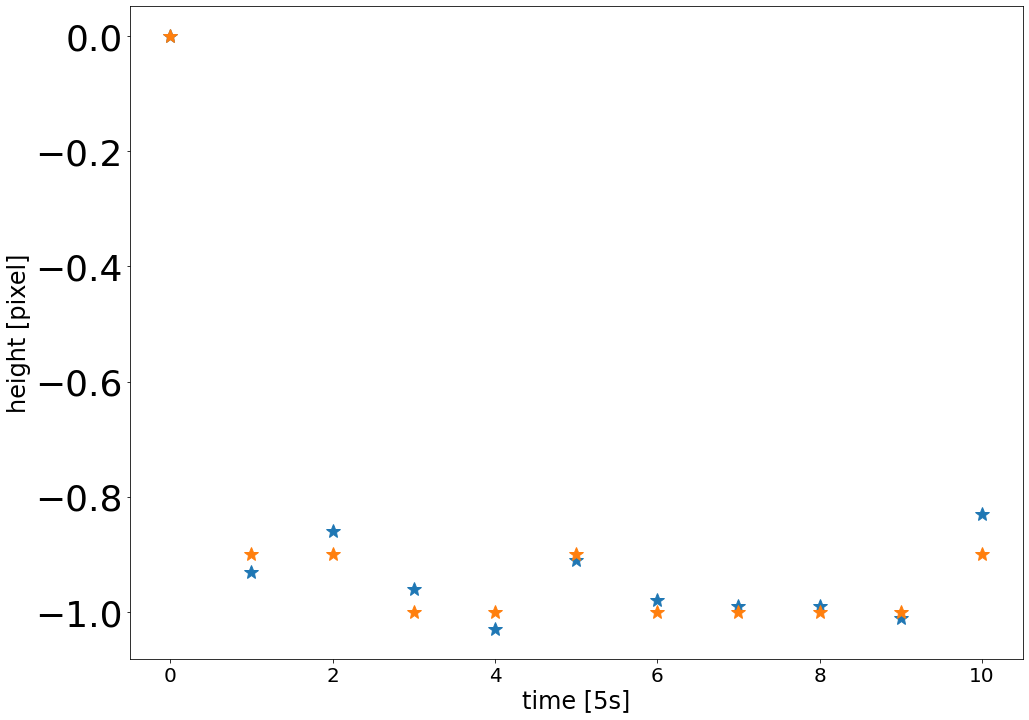

In [90]:
plt.plot(np.stack(shiftlist,axis=1)[0],ls="",marker="*",ms=15)
plt.plot(np.stack(shiftlist2,axis=1)[0],ls="",marker="*",ms=15)

plt.ylabel("height [pixel]")
plt.xlabel("time [5s]")